# 1 Data wrangling<a id='1_Data_wrangling'></a>

## 1.1 Introduction<a id='1.1_Introduction'></a>

This step focuses on collecting the data, organizing it, cleaning it and making sure it's well defined. 

## 1.2 Imports<a id='1.2_Imports'></a>

In [1]:
# Import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import statsmodels.api as sm
import os
from library.sb_utils import save_file
from sklearn import datasets,linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import datetime

## 1.3 Objectives<a id='1.3_Objectives'></a>

In [2]:
# explain the objectives of this project

## 1.4 Load Data

### 1.4.1 Load CO2 Emission Data

In [3]:
# the supplied xlsx data file is the raw_data directory
co2_raw_data = pd.read_excel('../raw_data/co2_emission_data_with_popu_gdp.xlsx')

In [4]:
#Call the info method on co2_raw_data to see a summary of the data
co2_raw_data.info()
# join temperature, latitude, logitude, by iso_code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
iso_code                               20930 non-null object
country                                23708 non-null object
year                                   23708 non-null int64
annual_co2_prod_Megaton                23170 non-null float64
co2_growth_prct                        21910 non-null float64
co2_growth_abs                         22017 non-null float64
consumption_co2                        3350 non-null float64
trade_co2                              3318 non-null float64
trade_co2_share                        3318 non-null float64
co2_per_capita                         22383 non-null float64
consumption_co2_per_capita             3350 non-null float64
share_global_co2                       23103 non-null float64
cumulative_co2                         23578 non-null float64
share_global_cumulative_co2            23578 non-null float64
co2_per_gdp                    

In [5]:
#Call the head method on co2_raw_data to print the first several rows of the data
co2_raw_data.head()

,iso_code,country,year,annual_co2_prod_Megaton,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [6]:
co2_raw_data.describe()

,year,annual_co2_prod_Megaton,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
count,23708.000000,23170.000000,21910.000000,22017.000000,3350.000000,3318.000000,3318.000000,22383.000000,3350.000000,23103.000000,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,6044.000000,6044.000000,6044.000000,2.107100e+04,1.300200e+04
mean,1951.670997,270.245818,17.705591,5.784158,222.596056,3.673305,27.047046,4.059490,6.556161,5.155362,...,8.099506,82.253370,2.046923,29.308135,0.606690,1638.281196,27401.710621,2.293554,5.927539e+07,4.396605e+11
std,53.828319,1509.911932,290.750382,54.859594,773.261390,100.251878,52.599781,15.339885,7.303592,18.014885,...,9.387477,566.702756,3.534126,199.291118,0.844671,9666.490291,33293.462203,1.681657,3.730743e+08,3.666682e+12
min,1750.000000,-1.165000,-2835.714000,-860.211000,-1.344000,-1487.155000,-118.238000,-2.675000,-0.396000,-0.030000,...,-50.487000,0.000000,0.000000,0.000000,0.000000,0.208000,111.472000,0.048000,1.000000e+03,6.378000e+07
25%,1922.000000,0.546000,-1.070000,-0.011000,8.942000,0.000000,0.000000,0.234000,1.100500,0.006000,...,2.514000,2.150000,0.715000,0.535000,0.228000,46.319000,5829.803000,1.247000,1.333018e+06,8.926728e+09
50%,1965.000000,5.168000,4.361000,0.088000,36.854000,2.348000,16.319500,1.209000,4.040000,0.072000,...,5.474000,9.030000,1.111000,3.590000,0.384000,148.790500,15359.988500,1.823500,4.856304e+06,2.966217e+10
75%,1993.000000,44.799000,11.450750,1.272000,141.397000,9.545500,40.842000,4.632500,9.829750,0.626000,...,10.299000,31.055000,1.690000,10.570000,0.607000,518.953000,37103.698250,2.700500,1.594407e+07,1.210000e+11
max,2019.000000,36441.388000,20100.000000,1667.711000,8959.962000,533.928000,1470.066000,794.334000,58.736000,100.000000,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,153848.433000,317582.244000,14.939000,7.713468e+09,1.065610e+14


In [7]:
type(co2_raw_data)

pandas.core.frame.DataFrame

### 1.4.2 Load agriculture land use data

In [8]:
agri_land_raw_data = pd.read_csv('../raw_data/UNDATA_FAOSTAT_AgriculturalLand.csv')

In [9]:
agri_land_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14378 entries, 0 to 14377
Data columns (total 6 columns):
Country or Area    14377 non-null object
Element            14377 non-null object
Year               14369 non-null float64
Unit               14369 non-null object
Value              14369 non-null float64
Value Footnotes    14369 non-null object
dtypes: float64(2), object(4)
memory usage: 674.1+ KB


In [10]:
agri_land_raw_data.head()

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Afghanistan,Area,2018.0,1000 ha,37919.0,Q
1,Afghanistan,Area,2017.0,1000 ha,37910.0,Q
2,Afghanistan,Area,2016.0,1000 ha,37910.0,Q
3,Afghanistan,Area,2015.0,1000 ha,37910.0,Q
4,Afghanistan,Area,2014.0,1000 ha,37910.0,Q


In [11]:
agri_land_raw_data.describe()

,Year,Value
count,14369.000000,1.436900e+04
mean,1990.245111,9.375771e+04
std,16.763517,3.575405e+05
min,1961.000000,3.000000e-01
25%,1976.000000,1.350000e+02
50%,1991.000000,3.726000e+03
75%,2005.000000,3.516000e+04
max,2018.000000,4.882180e+06


### 1.4.3 Load beef production data

In [12]:
beef_prod_raw_data = pd.read_csv('../raw_data/UNDATA_FAOSTAT_BeefMeatProduction.csv')

In [13]:
beef_prod_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 6 columns):
Country or Area    13196 non-null object
Element            13196 non-null object
Year               13194 non-null float64
Unit               13194 non-null object
Value              13194 non-null float64
Value Footnotes    13194 non-null object
dtypes: float64(2), object(4)
memory usage: 618.7+ KB


In [14]:
beef_prod_raw_data.head()

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Afghanistan,Production,2018.0,tonnes,129691.0,A
1,Afghanistan,Production,2017.0,tonnes,128357.0,A
2,Afghanistan,Production,2016.0,tonnes,134747.0,A
3,Afghanistan,Production,2015.0,tonnes,136428.0,A
4,Afghanistan,Production,2014.0,tonnes,137429.0,A


In [15]:
beef_prod_raw_data.describe()

,Year,Value
count,13194.000000,1.319400e+04
mean,1990.243292,1.039205e+06
std,16.761382,4.350958e+06
min,1961.000000,0.000000e+00
25%,1976.000000,3.037000e+03
50%,1991.000000,4.693100e+04
75%,2005.000000,3.121882e+05
max,2018.000000,7.160131e+07


## 1.5 Explore The Data

### 1.5.1 Explore each data

In [16]:
co2_raw_data.columns

Index(['iso_code', 'country', 'year', 'annual_co2_prod_Megaton',
       'co2_growth_prct', 'co2_growth_abs', 'consumption_co2', 'trade_co2',
       'trade_co2_share', 'co2_per_capita', 'consumption_co2_per_capita',
       'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2',
       'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy',
       'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'other_co2_per_capita', 'share_global_coal_co2', 'share_global_oil_co2',
       'share_global_gas_co2', 'share_global_flaring_co2',
       'share_global_cement_co2', 'cumulative_coal_co2', 'cumulative_oil_co2',
       'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulative_gas_c

In [17]:
column = ['iso_code', 'country', 'year', 'annual_co2_prod_Megaton','primary_energy_consumption','population', 'gdp']
# choose one targed variable and one feature to train linear regression
# treat NaN, create categorical featrue
# .isnan, pin that as a new column "_isnan", 
# use fillnan to replace NaN with "1" or mean(), median(), "1" will make coeff easier to be explained.
# coefficient will work for NaN after train the data.
# .score???

In [18]:
co2_data = pd.DataFrame(co2_raw_data, columns = column)

In [19]:
co2_data.head()

,iso_code,country,year,annual_co2_prod_Megaton,primary_energy_consumption,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,NaN,8040000.0,2.201546e+10


In [20]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 7 columns):
iso_code                      20930 non-null object
country                       23708 non-null object
year                          23708 non-null int64
annual_co2_prod_Megaton       23170 non-null float64
primary_energy_consumption    6044 non-null float64
population                    21071 non-null float64
gdp                           13002 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [21]:
co2_data['year'] = co2_data.year.astype(str)
co2_data['year'] = pd.to_datetime(co2_data['year'])
co2_data

,iso_code,country,year,annual_co2_prod_Megaton,primary_energy_consumption,population,gdp
0,AFG,Afghanistan,1949-01-01,0.015,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950-01-01,0.084,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951-01-01,0.092,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952-01-01,0.092,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953-01-01,0.106,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...
23703,ZWE,Zimbabwe,2015-01-01,12.170,NaN,13815000.0,2.503057e+10
23704,ZWE,Zimbabwe,2016-01-01,10.815,NaN,14030000.0,2.515176e+10
23705,ZWE,Zimbabwe,2017-01-01,10.247,NaN,14237000.0,NaN
23706,ZWE,Zimbabwe,2018-01-01,11.341,NaN,14439000.0,NaN


In [22]:
missing = pd.concat([co2_data.isnull().sum(), 100 * co2_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'],ascending=False)

,count,%
primary_energy_consumption,17664,74.506496
gdp,10706,45.157753
iso_code,2778,11.717564
population,2637,11.122828
annual_co2_prod_Megaton,538,2.269276
country,0,0.000000
year,0,0.000000


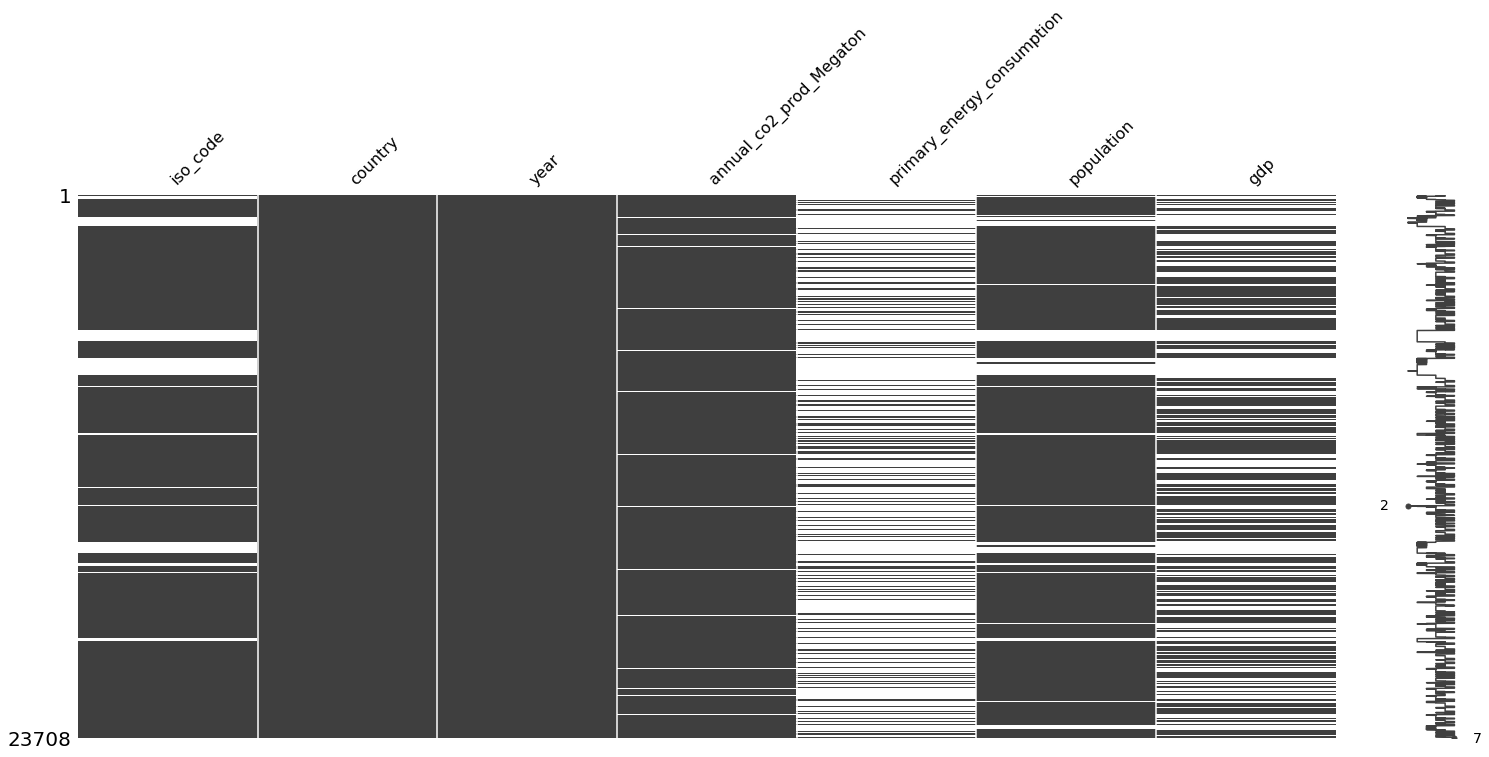

In [23]:
msno.matrix(co2_data)
plt.show()

In [24]:
co2_energy_data = co2_data.groupby('country')['primary_energy_consumption'].mean().sort_values(ascending=False)
co2_energy_data.head(20)

country
World             96268.492250
United States     21604.201947
China             12098.535923
Russia             8190.394531
Japan              4462.682351
Germany            3701.785614
India              2968.743365
Canada             2720.967421
United Kingdom     2431.474211
France             2359.570632
Ukraine            1815.220562
Brazil             1672.067308
Italy              1654.387228
South Korea        1431.100462
Mexico             1252.000365
Saudi Arabia       1140.888192
Iran               1133.397596
Poland             1124.294439
Spain              1051.391421
Australia          1004.518175
Name: primary_energy_consumption, dtype: float64

In [25]:
agri_land_raw_data.columns

Index(['Country or Area', 'Element', 'Year', 'Unit', 'Value',
       'Value Footnotes'],
      dtype='object')

In [26]:
column = ['Country or Area', 'Year', 'Unit', 'Value']
agri_land_data = pd.DataFrame(agri_land_raw_data, columns = column)

In [27]:
agri_land_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14378 entries, 0 to 14377
Data columns (total 4 columns):
Country or Area    14377 non-null object
Year               14369 non-null float64
Unit               14369 non-null object
Value              14369 non-null float64
dtypes: float64(2), object(2)
memory usage: 449.4+ KB


In [28]:
agri_land_data = agri_land_data.dropna(how='any')

In [29]:
missing = pd.concat([agri_land_data.isnull().sum(), 100 * agri_land_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'],ascending=False)

,count,%
Country or Area,0,0.0
Year,0,0.0
Unit,0,0.0
Value,0,0.0


In [30]:
agri_land_data['Year'] = agri_land_data.Year.astype(int).astype(str)
agri_land_data['Year'] = pd.to_datetime(agri_land_data['Year'])
agri_land_data

,Country or Area,Year,Unit,Value
0,Afghanistan,2018-01-01,1000 ha,37919.0
1,Afghanistan,2017-01-01,1000 ha,37910.0
2,Afghanistan,2016-01-01,1000 ha,37910.0
3,Afghanistan,2015-01-01,1000 ha,37910.0
4,Afghanistan,2014-01-01,1000 ha,37910.0
...,...,...,...,...
14364,Zimbabwe,1965-01-01,1000 ha,11305.0
14365,Zimbabwe,1964-01-01,1000 ha,11240.0
14366,Zimbabwe,1963-01-01,1000 ha,11155.0
14367,Zimbabwe,1962-01-01,1000 ha,11070.0


In [31]:
beef_prod_raw_data.columns

Index(['Country or Area', 'Element', 'Year', 'Unit', 'Value',
       'Value Footnotes'],
      dtype='object')

In [32]:
beef_prod_raw_data.head()

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Afghanistan,Production,2018.0,tonnes,129691.0,A
1,Afghanistan,Production,2017.0,tonnes,128357.0,A
2,Afghanistan,Production,2016.0,tonnes,134747.0,A
3,Afghanistan,Production,2015.0,tonnes,136428.0,A
4,Afghanistan,Production,2014.0,tonnes,137429.0,A


In [33]:
column = ['Country or Area', 'Year', 'Unit', 'Value']
beef_prod_data = pd.DataFrame(beef_prod_raw_data, columns = column)

In [34]:
beef_prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 4 columns):
Country or Area    13196 non-null object
Year               13194 non-null float64
Unit               13194 non-null object
Value              13194 non-null float64
dtypes: float64(2), object(2)
memory usage: 412.5+ KB


In [35]:
beef_prod_data = beef_prod_data.dropna(how='any')

In [36]:
missing = pd.concat([beef_prod_data.isnull().sum(), 100 * beef_prod_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'],ascending=False)

,count,%
Country or Area,0,0.0
Year,0,0.0
Unit,0,0.0
Value,0,0.0


In [37]:
beef_prod_data['Year'] = beef_prod_data.Year.astype(int).astype(str)
beef_prod_data['Year'] = pd.to_datetime(beef_prod_data['Year'])
beef_prod_data

,Country or Area,Year,Unit,Value
0,Afghanistan,2018-01-01,tonnes,129691.0
1,Afghanistan,2017-01-01,tonnes,128357.0
2,Afghanistan,2016-01-01,tonnes,134747.0
3,Afghanistan,2015-01-01,tonnes,136428.0
4,Afghanistan,2014-01-01,tonnes,137429.0
...,...,...,...,...
13189,Zimbabwe,1965-01-01,tonnes,53440.0
13190,Zimbabwe,1964-01-01,tonnes,52605.0
13191,Zimbabwe,1963-01-01,tonnes,55945.0
13192,Zimbabwe,1962-01-01,tonnes,54375.0


### 1.5.2 Join tables

In [38]:
pd.merge(agri_land_data, beef_prod_data)

,Country or Area,Year,Unit,Value


In [39]:
agri_and_beef = pd.merge(agri_land_data,beef_prod_data, how='outer', on=['Country or Area', 'Year'], 
                         sort=False, suffixes = ('_argi','_beef'))

In [40]:
agri_and_beef

,Country or Area,Year,Unit_argi,Value_argi,Unit_beef,Value_beef
0,Afghanistan,2018-01-01,1000 ha,37919.0,tonnes,129691.0
1,Afghanistan,2017-01-01,1000 ha,37910.0,tonnes,128357.0
2,Afghanistan,2016-01-01,1000 ha,37910.0,tonnes,134747.0
3,Afghanistan,2015-01-01,1000 ha,37910.0,tonnes,136428.0
4,Afghanistan,2014-01-01,1000 ha,37910.0,tonnes,137429.0
...,...,...,...,...,...,...
14431,Netherlands Antilles (former),2014-01-01,NaN,NaN,tonnes,22.0
14432,Netherlands Antilles (former),2013-01-01,NaN,NaN,tonnes,23.0
14433,Netherlands Antilles (former),2012-01-01,NaN,NaN,tonnes,23.0
14434,Netherlands Antilles (former),2011-01-01,NaN,NaN,tonnes,20.0


In [41]:
for i  in range(len(agri_and_beef['Country or Area'])):
    agri_and_beef['Country or Area'][i] = agri_and_beef['Country or Area'][i].replace(' (former)','')
    
agri_and_beef

C:\Users\zul332\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country or Area,Year,Unit_argi,Value_argi,Unit_beef,Value_beef
0,Afghanistan,2018-01-01,1000 ha,37919.0,tonnes,129691.0
1,Afghanistan,2017-01-01,1000 ha,37910.0,tonnes,128357.0
2,Afghanistan,2016-01-01,1000 ha,37910.0,tonnes,134747.0
3,Afghanistan,2015-01-01,1000 ha,37910.0,tonnes,136428.0
4,Afghanistan,2014-01-01,1000 ha,37910.0,tonnes,137429.0
...,...,...,...,...,...,...
14431,Netherlands Antilles,2014-01-01,NaN,NaN,tonnes,22.0
14432,Netherlands Antilles,2013-01-01,NaN,NaN,tonnes,23.0
14433,Netherlands Antilles,2012-01-01,NaN,NaN,tonnes,23.0
14434,Netherlands Antilles,2011-01-01,NaN,NaN,tonnes,20.0


In [42]:
co2_data2 = pd.merge(co2_data,agri_and_beef, how='outer', left_on=['country','year'],
                         right_on=['Country or Area', 'Year'], sort=False).drop(columns=['Country or Area', 'Year'], inplace=False)

In [43]:
co2_data = co2_data2.dropna(subset=['country', 'year','annual_co2_prod_Megaton'])

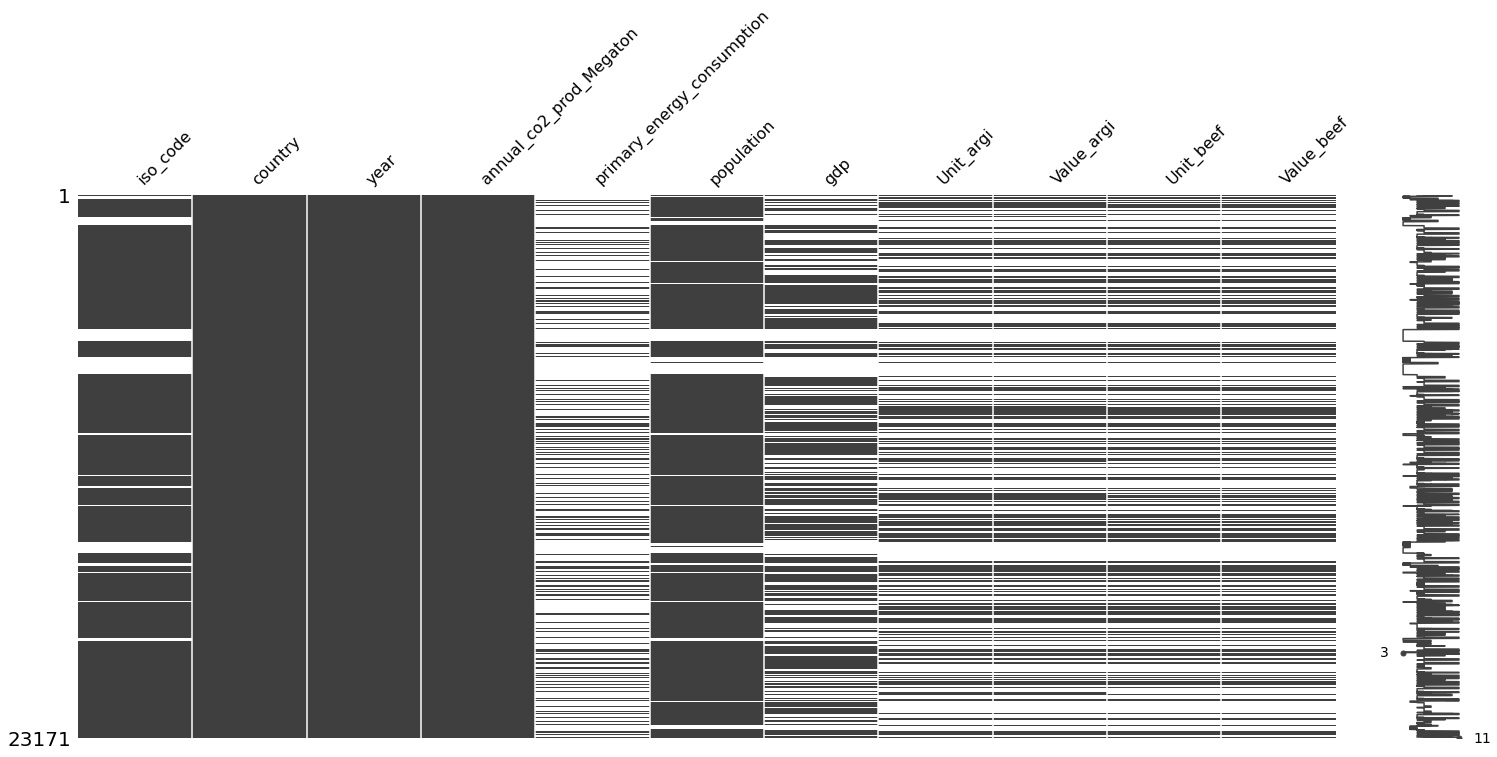

In [44]:
msno.matrix(co2_data)
plt.show()

### 1.5.3 Add columns

In [45]:
co2_data['energy_isnan'] = np.isnan(co2_data['primary_energy_consumption'])
co2_data['gdp_isnan'] = np.isnan(co2_data['gdp'])
co2_data['population_isnan'] = np.isnan(co2_data['population'])
co2_data['argi_isnan'] = np.isnan(co2_data['Value_argi'])
co2_data['beef_isnan'] = np.isnan(co2_data['Value_beef'])
print(co2_data.head())

  iso_code      country       year  annual_co2_prod_Megaton  \
0      AFG  Afghanistan 1949-01-01                    0.015   
1      AFG  Afghanistan 1950-01-01                    0.084   
2      AFG  Afghanistan 1951-01-01                    0.092   
3      AFG  Afghanistan 1952-01-01                    0.092   
4      AFG  Afghanistan 1953-01-01                    0.106   

   primary_energy_consumption  population           gdp Unit_argi  Value_argi  \
0                         NaN   7663783.0           NaN       NaN         NaN   
1                         NaN   7752000.0  1.949480e+10       NaN         NaN   
2                         NaN   7840000.0  2.006385e+10       NaN         NaN   
3                         NaN   7936000.0  2.074235e+10       NaN         NaN   
4                         NaN   8040000.0  2.201546e+10       NaN         NaN   

  Unit_beef  Value_beef  energy_isnan  gdp_isnan  population_isnan  \
0       NaN         NaN          True       True             Fal

C:\Users\zul332\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\zul332\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zul332\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [46]:
# add columns relate countries to developed and undeveloped
# convert year to date type
# add columns relate countries to region/continent

## 1.6 Save data

In [47]:
co2_data.shape

(23171, 16)

In [48]:
# save the data to a new csv file
datapath = '../data'
save_file(co2_data, 'co2_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\co2_data_cleaned.csv"
